In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [4]:
train=pd.read_csv("train.csv")

In [5]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [7]:
train.shape

(614, 13)

In [8]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [9]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [10]:
train.count

<bound method DataFrame.count of       Loan_ID  Gender Married Dependents     Education Self_Employed  \
0    LP001002    Male      No          0      Graduate            No   
1    LP001003    Male     Yes          1      Graduate            No   
2    LP001005    Male     Yes          0      Graduate           Yes   
3    LP001006    Male     Yes          0  Not Graduate            No   
4    LP001008    Male      No          0      Graduate            No   
..        ...     ...     ...        ...           ...           ...   
609  LP002978  Female      No          0      Graduate            No   
610  LP002979    Male     Yes         3+      Graduate            No   
611  LP002983    Male     Yes          1      Graduate            No   
612  LP002984    Male     Yes          2      Graduate            No   
613  LP002990  Female      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5849         

In [11]:
train['Loan_ID'].value_counts()

LP001222    1
LP001131    1
LP002308    1
LP002082    1
LP002863    1
           ..
LP001562    1
LP001945    1
LP002223    1
LP001750    1
LP001610    1
Name: Loan_ID, Length: 614, dtype: int64

In [12]:
train['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [13]:
train['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [14]:
train['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [15]:
train['Education'].value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

In [16]:
train['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [17]:
train['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [18]:
train['ApplicantIncome'].value_counts()

2500    9
4583    6
2600    6
6000    6
5000    5
       ..
5818    1
5819    1
5821    1
2750    1
3691    1
Name: ApplicantIncome, Length: 505, dtype: int64

In [19]:
train['CoapplicantIncome'].value_counts()

0.0       273
1666.0      5
2083.0      5
2500.0      5
1750.0      3
         ... 
7166.0      1
2138.0      1
2166.0      1
3541.0      1
3021.0      1
Name: CoapplicantIncome, Length: 287, dtype: int64

In [20]:
train['LoanAmount'].value_counts()

120.0    20
110.0    17
100.0    15
187.0    12
160.0    12
         ..
570.0     1
300.0     1
376.0     1
117.0     1
311.0     1
Name: LoanAmount, Length: 203, dtype: int64

In [21]:
train['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [22]:
train['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

In [23]:
train['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [24]:
train.Gender=pd.get_dummies(train.Gender,drop_first=True)
train.Married=pd.get_dummies(train.Married,drop_first=True)
train.Self_Employed=pd.get_dummies(train.Self_Employed,drop_first=True)

In [25]:
x1=train.Loan_Status
x2=train.Gender
x3=train.Education
x4=train.Married
x5=train.Self_Employed
x6=train.Property_Area
x7=train.Credit_History

Text(0.5, 1.0, 'Active Loan')

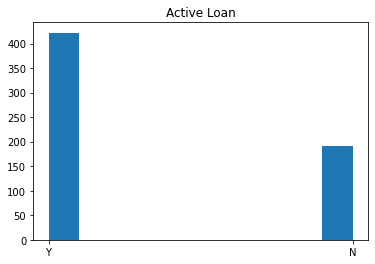

In [26]:
plt.hist(x1)
plt.title("Active Loan")

Text(0.5, 1.0, 'Education')

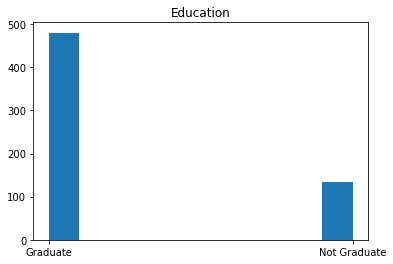

In [27]:
plt.hist(x3)
plt.title("Education")

Text(0.5, 0, 'Unmarried                                                                        Married')

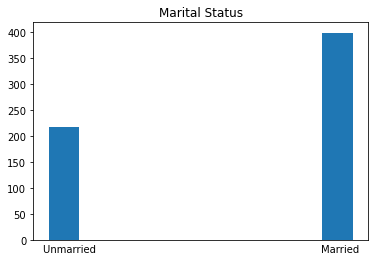

In [28]:
plt.hist(x4)
plt.title("Marital Status")
plt.xticks([])
plt.xlabel("Unmarried                                                                        Married")

([], <a list of 0 Text major ticklabel objects>)

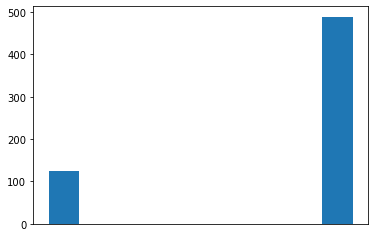

In [29]:
plt.hist(x2)
plt.xticks([])

Text(0.5, 1.0, 'Self Employed')

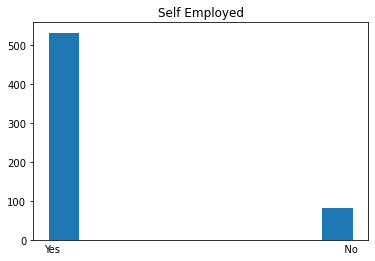

In [30]:
plt.hist(x5)
plt.xticks([])
plt.xlabel("Yes                                                                                           No")
plt.title("Self Employed")

Text(0.5, 1.0, 'Property Area')

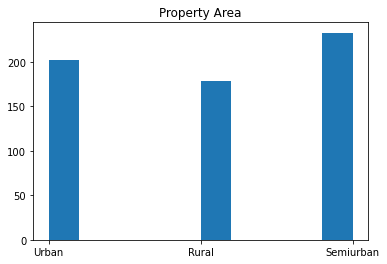

In [31]:
plt.hist(x6)
plt.title("Property Area")

Text(0.5, 0, 'Bad                                                                               Good')

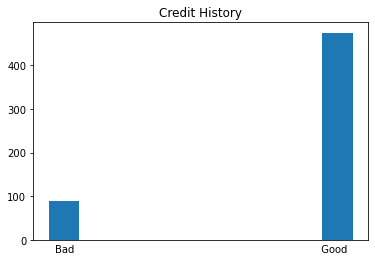

In [32]:
 plt.hist(x7)
 plt.title("Credit History")
plt.xticks([])
plt.xlabel("Bad                                                                               Good")

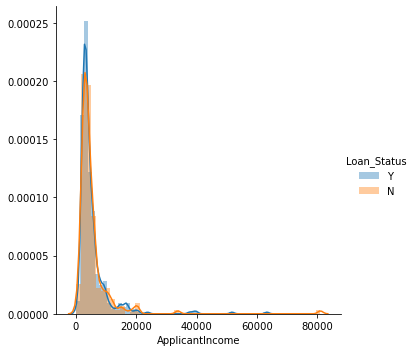

In [33]:
sns.set_style = ("whitegrid");
sns.FacetGrid(train,hue="Loan_Status",size=5)\
    .map(sns.distplot,"ApplicantIncome")\
    .add_legend();
plt.show()

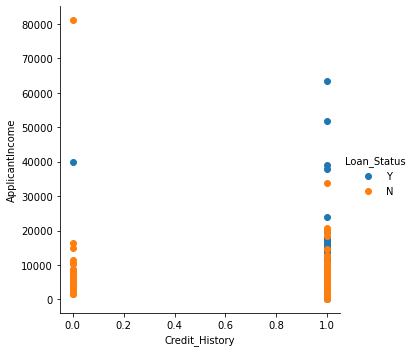

In [34]:
sns.set_style = ("whitegrid");
sns.FacetGrid(train,hue="Loan_Status",size=5)\
    .map(plt.scatter, "Credit_History","ApplicantIncome")\
    .add_legend();
plt.show()

<Figure size 720x432 with 0 Axes>

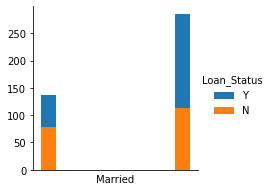

In [35]:
plt.figure(figsize=(10,6))
sns.set_style = ("whitegrid");
sns.FacetGrid(train,hue="Loan_Status")\
    .map(plt.hist,"Married")\
    .add_legend();
plt.xticks([])
# plt.xlabel("Unmarried                                                                        Married")
plt.show()

<Figure size 720x432 with 0 Axes>

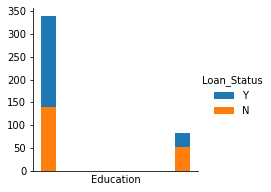

In [36]:
plt.figure(figsize=(10,6))
sns.set_style = ("whitegrid");
sns.FacetGrid(train,hue="Loan_Status")\
    .map(plt.hist,"Education")\
    .add_legend();
plt.xticks([])
# plt.xlabel("Unmarried                                                                        Married")
plt.show()

In [37]:
train.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents           15
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [38]:
train1=train.copy()

In [51]:
train1.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [60]:
train['Gender'].fillna(train['Gender'].mode()[0], inplace=True)
train['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True)
train['Married'].fillna(train['Married'].mode()[0], inplace=True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True)

In [61]:
train['LoanAmount'].median()

128.0

In [62]:
train['LoanAmount'].fillna(128, inplace=True)

In [63]:
train['Loan_Amount_Term'].value_counts()

360.0    526
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [64]:
train['Loan_Amount_Term'].median()

360.0

In [65]:
train['Loan_Amount_Term'].fillna(360, inplace=True)

In [66]:
train1=train.copy()

In [67]:
train1.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [68]:
train1.apply(lambda train: len(train.unique())) #here we are checking the unique IDs for columns

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

In [69]:
train.Loan_Status=pd.get_dummies(train.Loan_Status,drop_first=True)

In [78]:
train.drop(columns="Loan_ID",inplace=True)

In [79]:
y=train.Loan_Status

AttributeError: 'DataFrame' object has no attribute 'Loan_Status'

In [80]:
train.drop(columns="Loan_Status",inplace=True)

KeyError: "['Loan_Status'] not found in axis"

In [86]:
train.drop(columns="Dependents",inplace=True)

In [94]:
train.drop(columns="Education",inplace=True)

KeyError: "['Education'] not found in axis"

In [100]:
train.drop(columns="Property_Area",inplace=True)

In [101]:
train.shape

(614, 8)

In [102]:
from sklearn.model_selection import train_test_split
train_train, train_test, y_train, y_test = train_test_split(train, y, test_size=0.25, random_state=1)

In [118]:
from sklearn.ensemble import RandomForestClassifier,VotingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [119]:
rfc=RandomForestClassifier(random_state=0)
# svc=SVC()
# knn=KNeighborsClassifier()
# dt=DecisionTreeClassifier()
# nb=GaussianNB()

In [120]:
# estimators=[('nb',nb),('rfc',rfc),('dt',dt),('svc',svc),('knn',knn)]

In [127]:
rf=RandomForestClassifier(random_state=1,n_estimators=200)

In [128]:
rf.fit(train_train,y_train)

RandomForestClassifier(n_estimators=200, random_state=1)

In [130]:
result=rf.predict(train_test)

In [131]:
accuracy_score(y_test,result)

0.7922077922077922

In [121]:
# voting=VotingClassifier(estimators=estimators,voting='hard')

In [138]:
# voting.fit_transform(train_train,y_train)

In [117]:
# from sklearn.model_selection import ShuffleSplit
# from sklearn.model_selection import cross_val_score
# from sklearn.linear_model import LogisticRegression
# cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

# cross_val_score(train, y, cv=cv)


# from sklearn.model_selection import GridSearchCV

# from sklearn.linear_model import Lasso
# from sklearn.tree import DecisionTreeRegressor

# def find_best_model_using_gridsearchcv(train,y):
#     algos ={
#         'lasso': {
#             'model': Lasso(),
#             'params': {
#                 'alpha': [1,2],
#                 'selection': ['random', 'cyclic']
#             }
#         },
#         'decision_tree': {
#             'model': DecisionTreeRegressor(),
#             'params': {
#                 'criterion' : ['mse','friedman_mse'],
#                 'splitter': ['best','random']
#             }
#         }
#     }
#     scores = []
#     cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
#     for algo_name, config in algos.items():
#         gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
#         gs.fit(train,y)
#         scores.append({
#             'model': algo_name,
#             'best_score': gs.best_score_,
#             'best_params': gs.best_params_
#         })

#     return pd.DataFrame(scores,columns=['model','best_score','best_params'])
# find_best_model_using_gridsearchcv(train,y)

In [132]:
# res=rf.predict(train_test)

In [137]:
# accuracy_score(y_test,res)

In [136]:
# y.head()

In [135]:
# result_y=rf.predict(y)